# Logic Homework

## Initialization

In [ ]:
from utils import expr
import numpy as np

from kb import DpllPropKB, FCPropKB
from draw import draw
import sudoku_maps as maps
from field_var import field_var
from ask_solution import ask_solution

##  Sudoku

In this exercise we will work with 2x2 sudoku, i.e. sudoku where the numbers of each row, column, and square block go from 1 to 4. Your task is to implement the knowledge basis needed to solve the sudoku, given the sudoku's initial state. 

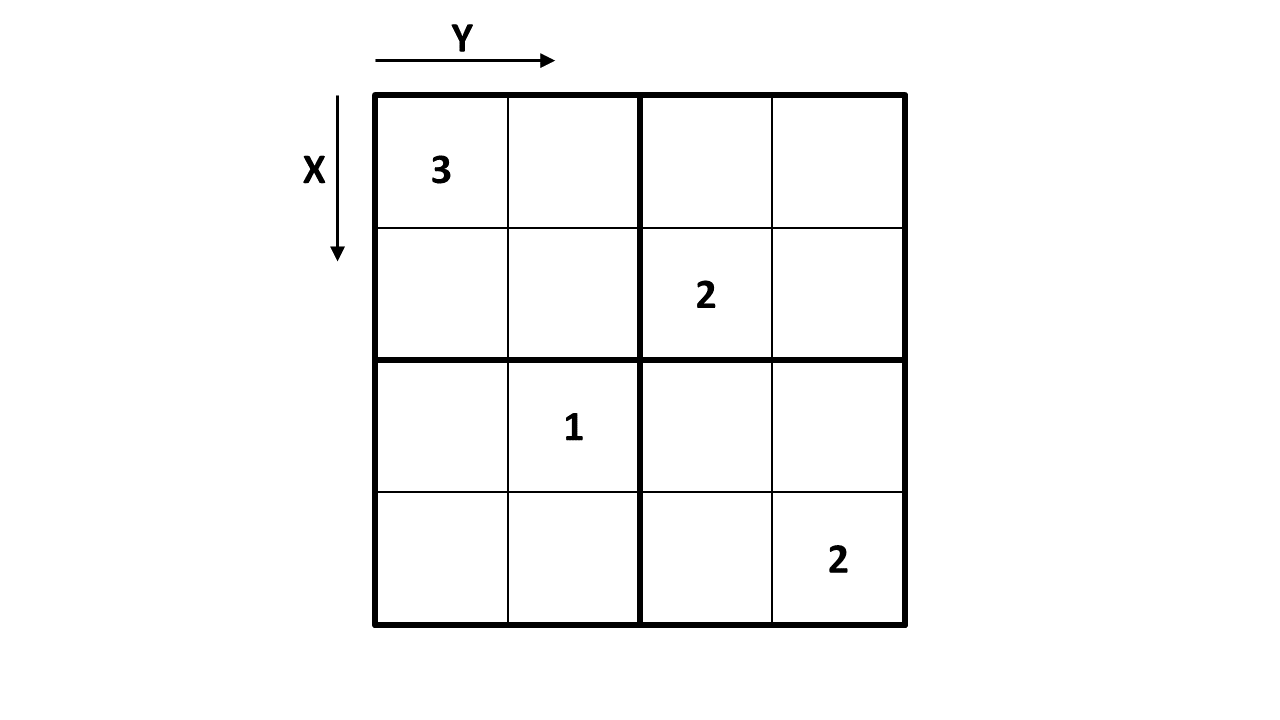

The initialized sudoku is given as an array - a np.ndarray to be precise - of shape (4,4), where the first dimension denotes the rows and the second the columns. In other words, $sudoku[x][y]$ contains the number in square xy. 
The sudoku array contains the following values: 0,1,2,3,4. The number 0 means that the corresponding square is initialized as empty.


In [ ]:
# choose a sudoku map: possible values: 1, 2, 3, 4, 5
sudoku_index = 1
sudoku = getattr(maps, "sudoku"+str(sudoku_index))

##as you can see, sudoku is a 4x4 array. 
print('The sudoku array: ', sudoku)

##a better overview of the sudoku array
print('Pretty print of the sudoku array: ')
for row in sudoku:
    print(row)
#You can access the array elements with sudoku[x][y]
print('The number at position 0,0 is ', sudoku[0][0])
print('The number at position 1,2 is ', sudoku[1][2])

## Knowledge Base generation

### Variables:
For simplicity, in this homework there is only one variable: 

$V_{n, x, y}$, which means that at position [x, y] there is number n, with $x= 0, ..., 3$; $y = 0, ..., 3$; and $n = 1, ..., 4$. 
For example, $V_{2, 1, 2}$ means that the square where the second row and the third column meet contains number two. 

### The field_var method will help you generate correct  variables:

In [ ]:
###Example
#in square 1,2 there is number one 
V202 = field_var(value=2, x=1, y=2)

Always use this method to generate a field variable.

## Your Knowledge Base

Your task is to implement the knowledge basis in order to solve a 2x2 Sudoku, given the initialized sudoku. 

### The Sudoku must be solved according to the rules:

 - Valid numbers for each grid square are 1, 2, 3, and 4. 
 - Each row and each column must contain all valid numbers.
 - Each square block has to contain all the valid numbers within its squares.

The initial state of the sudoku is saved in the sudoku variable. 

### Sample knowledge base generation

In [ ]:
def generate_knowledge_example(initialized_sudoku):
    kb = []
    ##remember to add the initial state of the sudoku to the knowledge base
    if initialized_sudoku[x][y] == 1:
        new_proposition = field_var(1,x, y) # V1xy 
        kb.append(new_proposition)

    new_proposition = field_var(1,x, y) + " | ~" + field_var(2, x, y) # V1xy ∨ ¬V2xy
    kb.append(new_proposition)

    new_proposition = field_var(3,1, 1) + " ==> " + field_var(3,1, 1) # V311 ==> V311
    kb.append(new_proposition)

    new_proposition = field_var(2, x, y) + " & ~" + field_var(4, x, y) + " <=> False" # V2xy ∧ ¬V4xy <=> False
    kb.append(new_proposition)

    new_proposition = field_var(3,1, 1) + " <== " + field_var(3,1, 1) # V311 <== V311
    kb.append(new_proposition)


    return kb

## Your Task

Implement the function $generate\_knowledge$ in $generate\_knowledge.py$ such that the function takes an initialized sudoku as input and outputs the knowledge basis. 

Feel free to define in $generate\_knowledge.py$ any helper function you may need, but do not import any additional modules or packages, otherwise your solution will be marked as failed. This exercise is easily solvable without any additional packages.

Refer to the function generate_knowledge_example in the previous cell for correct syntax.

In [ ]:
from generate_knowledge import generate_knowledge

## Configuration

### Choose a knowledge base class:

possible values:

 - "Dpll"
  - use this knowledge base for dpll proving
  - this works for every kind of knowledge base


 - "FC"
  - use this knowledge base for proving with forward chaining
  - warning: the knowledge base should only contain clauses in the following forms for this to work:
     - α & .. & β ==> γ & .. & δ
     - α & .. & β <== γ & .. & δ
     - α & .. & β <=> γ & .. & δ
     - α & .. & β

In [ ]:
# possible values: "Dpll", "FC"
# kb_gen = "FC"
kb_gen = "Dpll"

KB = globals()[kb_gen+"PropKB"]

## Inference



In [ ]:
kb = KB() # create empty knowledge base

print("feed knowledge base with knowledge..")
for str_expr in generate_knowledge(sudoku):
    kb.tell(expr(str_expr))

# check if the knowledge base is obviosly wrong (you can remove this if it is too slow)
print("scan knowledge base for contradictions..")
assert not kb.has_contradicting_knowledge()


In [ ]:
sudoku_solution = ask_solution(kb)

In [ ]:
print('Pretty print of the sudoku array: ')
for row in sudoku_solution:
    print(row)
    
##draw the inferred solution. Initial numbers are in orange, inferred numbers in green. 
draw(sudoku_solution, sudoku)